# K-MEANS CLUSTERING 

ÇOK FAZLA SAYIDAKİ HAM VERİYİ GRUPLARA AYIRMAK İÇİN KULLANILIR.

UNSUPERLEARNING MODELDİR. ham veriler hakkında önceden sizin sınıflandırma yapmamanız gerekir.YZ sizin için sınıflandırmayı yapar,ona yol göstermenize gerek yoktur.Tüm işi kendi halleder.Bu işlem yapılırken centroid sistemini kullanr.(yuvarlak şekiller)
### Unsuperlearning modellerinden en yaygın kullanılanıdır.


Ham datayı gruplamak için önce kaç adet grup kullanacağını siz algoritmaya söylemeniz lazım: Kmeans kelimesindeki K => K adet centrodii ifade eder.
yani kaç gruba bölmesi gerektiğini söyleriz.

### NASIL ÇALIŞIR ?
1. K adet centroid (merkez nokta) seçilir.
2. her veriyi (noktayı) kendisine en yakın centroid grubuna dahil eder.k:3 ise 3 farklı gruba böler.
3. Her centroidin merkezini kendi grubundaki noktalara bakarak tekrar hesaplar,her renk için ağırlık merkezini hesaplar ve centroidi yeni merkez lokasyonuna koyar.ağırlık merkezini bulur yeni merkezleri
4. 2 ve 3 adımı centroidler artık yer değiştirmeyene kadar devam ettirir.
5. Artık centroidlerin merkezi değişmemektedir,bu durumda gruplamayı bitirir.

### Yeni bir nokta geldi karar verelim : 
Gruplandırma işlemi bittiğinde yeni bir
veri(nokta) geldiğinde, bu noktayı hangi gruba
dahil edeceğine karar verirken en yakın
centroid belirlenerek o centroidin bağlı olduğu
gruba ait olduğu kararlaştırılır.

### K değerini belirlerken elbow metodu kullanılır.
K değerleri distortion değerleri ile birlikte grafiğe
döktünüzde dirsek noktasında bulunan K değeri en
optimal K değeri olarak kabul edilir.  
Grafikteki alt dirsek noktası en iyi k değeri kabu edilir.

### NERDE KULLANILIR : 
Çok sayıda veri varsa ve biz sınıflandırma yapmayacaksak YZ SINIFLANDIRACAK.  
Toplu verinizin olduğu ve gruplama yapmak
istediğiniz ancak yapamadığınız her alanda
kullanabilirsiniz.  
MESELA...  
Müşteri segmentasyon alanında büyük şirketler kullanır.


### MÜŞTERİ SEGMENTASYONU 
AVM ler müşterilerin kartları sayesinde bazı bilgiler kaydetmiştir.Ancak bir gruplama yapmamıştır.Bu müşteirler için gruplama yapacağız.

In [7]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing  import MinMaxScaler
from matplotlib import pyplot as plt 


df = pd.read_csv("Avm_Musterileri.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


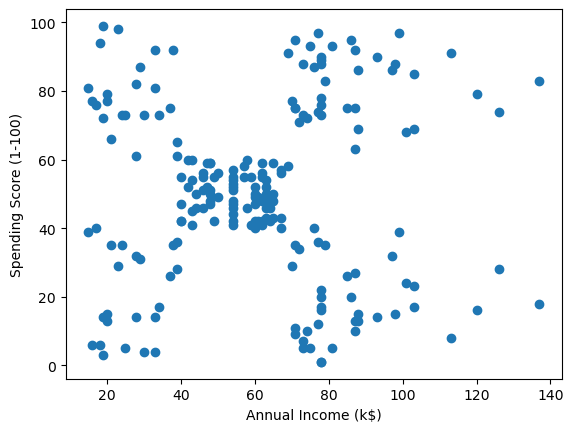

In [9]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')       # yıllık gelir
plt.ylabel('Spending Score (1-100)')  #harcama skoru
plt.show()

In [12]:
# sütun isimleri zuzun kısaltalım.
df.rename(columns = {'Annual Income (k$)' : 'income'},inplace = True)
df.rename(columns = {'Spending Score (1-100)' : 'score'},inplace = True)

### UNUTMAYIN ! Modelinize verileri basmadan önce mutlaka verilerinizi normalize etmelisiniz.!!!

Normalizasyonu kendimiz yapmıştık ama şimdi sklearn kütüphanesi ile yapacağız.
MinMaxScaler() fonksiyonunu kullanacağız.


In [17]:
scaler = MinMaxScaler()

scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

scaler.fit(df[['score']])
df['score'] = scaler.transform(df[['score']])

df.head()

# en düşük değere 0 en yüksek değere 1 verir.normalizasyon 0-1 arasında yapılır.

,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [21]:
import warnings
warnings.filterwarnings('ignore')    # HATALARI GÖSTERMEZ ÖNEMSİZ HATALARI...

In [22]:
k_range = range(1,11)   # 1-10 ARASI DEĞERLERE BAKALIM.

list_dist = []

for k in k_range:
    kmeans_modelim = KMeans(n_clusters=k)
    kmeans_modelim.fit(df[['income','score']])
    list_dist.append(kmeans_modelim.inertia_)

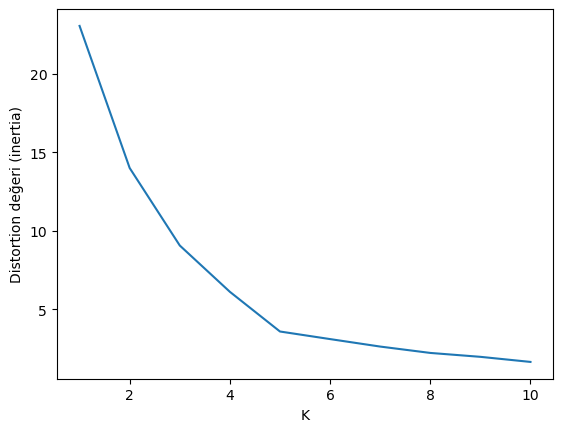

In [23]:
plt.xlabel('K')
plt.ylabel('Distortion değeri (inertia)'),
plt.plot(k_range,list_dist)
plt.show()

## En iyi k değeri 5 bulduk.

In [24]:
# k:5 değeri için k_means modeli oluşturalım.
kmeans_modelim = KMeans(n_clusters=5)
y_predicted = kmeans_modelim.fit_predict(df[['income','score']])
y_predicted


array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3,
       0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 4, 1, 3, 1, 4, 1, 4, 1,
       3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [25]:
df['cluster'] = y_predicted
df.head()

,CustomerID,income,score,cluster
0,1,0.000000,0.387755,0
1,2,0.000000,0.816327,2
2,3,0.008197,0.051020,0
3,4,0.008197,0.775510,2
4,5,0.016393,0.397959,0


In [27]:
# CENTROİDLERİ GÖRELİM.
kmeans_modelim.cluster_centers_

array([[0.09265859, 0.20319432],
       [0.58638083, 0.82783883],
       [0.08792846, 0.79962894],
       [0.33029751, 0.49508692],
       [0.6       , 0.16443149]])

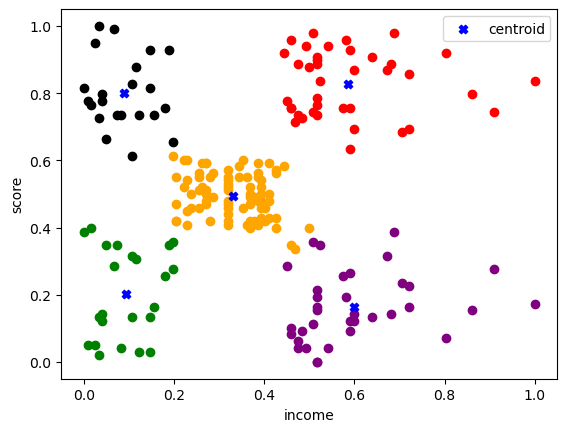

In [31]:
df1 = df[df.cluster==0]  # pandas filtreleme özelliği 
df2 = df[df.cluster==1]     # ile 5 df oluşturdum.ayrı renke oluşturmak için.
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

plt.xlabel('income')
plt.ylabel('score')
plt.scatter(df1['income'],df1['score'],color='green')
plt.scatter(df2['income'],df2['score'],color='red')
plt.scatter(df3['income'],df3['score'],color='black')
plt.scatter(df4['income'],df4['score'],color='orange')
plt.scatter(df5['income'],df5['score'],color='purple')

# kmeans_modelim.cluster_centers_ numpy 2 boyutlu array old.
  #için x ve y sütunlarını kmeans_modelim.cluster_centers_[0:1]
  #ve kmeans_modelim.cluster_centers_[:,1]  şeklinde scatter plot için alıyoruz.
plt.scatter(kmeans_modelim.cluster_centers_[:,0],kmeans_modelim.cluster_centers_[:,1],color = 'blue',marker='X',label='centroid')
plt.legend()
plt.show()